## 💻 Modelo de Classificação

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("marketing_investimento.csv")

In [3]:
df.head(3)

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos,aderencia_investimento
0,45,casado (a),superior,nao,242,nao,587,1,sim
1,42,casado (a),medio,nao,1289,nao,250,4,sim
2,23,solteiro (a),superior,nao,363,nao,16,18,nao


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   idade                   1268 non-null   int64 
 1   estado_civil            1268 non-null   object
 2   escolaridade            1268 non-null   object
 3   inadimplencia           1268 non-null   object
 4   saldo                   1268 non-null   int64 
 5   fez_emprestimo          1268 non-null   object
 6   tempo_ult_contato       1268 non-null   int64 
 7   numero_contatos         1268 non-null   int64 
 8   aderencia_investimento  1268 non-null   object
dtypes: int64(4), object(5)
memory usage: 89.3+ KB


 📊 **Exploração de categoria**

 ---

In [5]:
qtd_aderencia = df['aderencia_investimento'].value_counts().reset_index(name='quantidade')

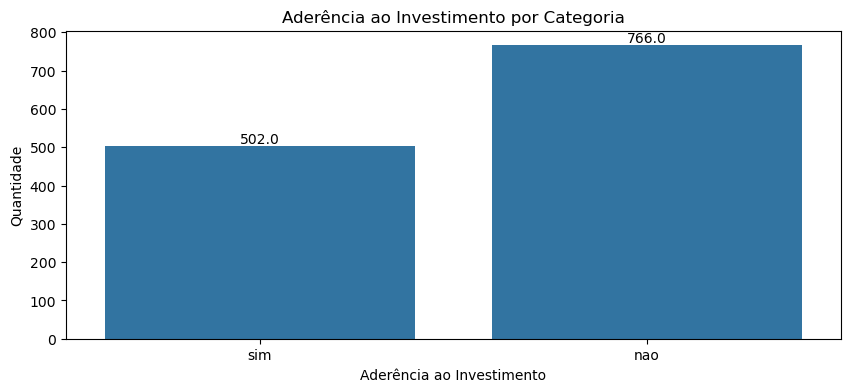

In [6]:
plt.figure(figsize=(10,4))
ax =sns.countplot(df, x="aderencia_investimento")
plt.title('Aderência ao Investimento por Categoria')
plt.xlabel('Aderência ao Investimento')
plt.ylabel('Quantidade')


for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

plt.show()


Explicação do que acontece aqui:

ax.patches pega todas as barras do gráfico.

p.get_height() retorna a altura da barra, que é o valor que você quer mostrar.

ax.annotate() insere o texto com o valor acima da barra, centralizado.

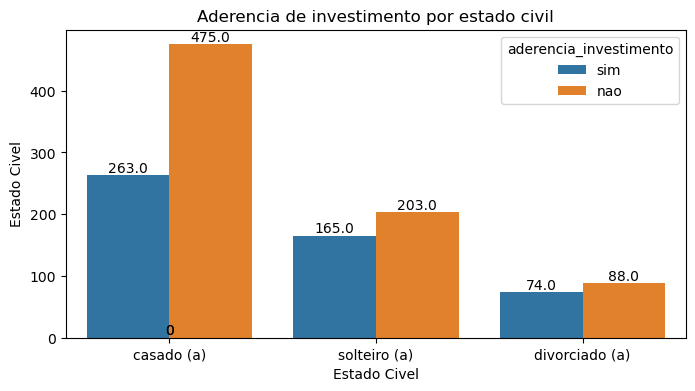

In [7]:
plt.figure(figsize=(8,4))
ax = sns.countplot(df, x='estado_civil', hue='aderencia_investimento')
plt.title("Aderencia de investimento por estado civil")
plt.xlabel("Estado Civel")
plt.ylabel("Estado Civel")

for p in ax.patches:
    altura = p.get_height()
    ax.annotate(f'{altura}',(p.get_x() + p.get_width() / 2., altura),
                ha='center', va='bottom')

plt.show()



C:\Users\emers\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


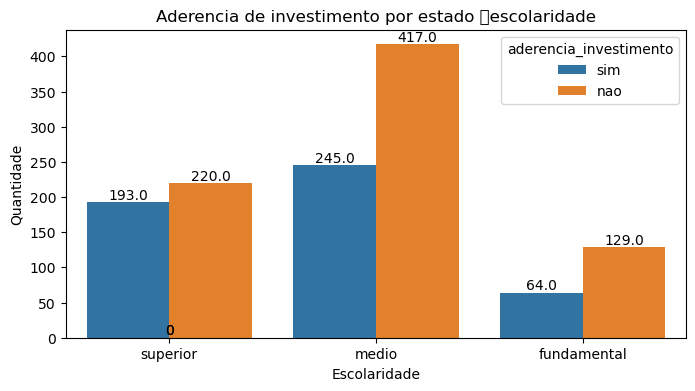

In [8]:
plt.figure(figsize=(8,4))
ax = sns.countplot(df, x='escolaridade', hue='aderencia_investimento')
plt.title("Aderencia de investimento por estado 	escolaridade")
plt.xlabel("Escolaridade")
plt.ylabel("Quantidade")

for p in ax.patches:
    altura = p.get_height()
    ax.annotate(f'{altura}',(p.get_x() + p.get_width() / 2., altura),
                ha='center', va='bottom')

plt.show()

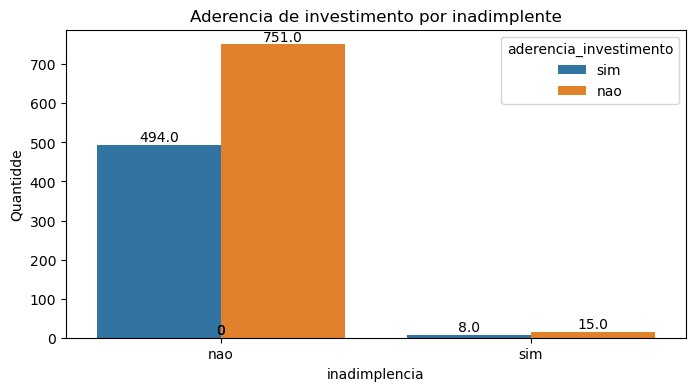

In [12]:
plt.figure(figsize=(8,4))
ax = sns.countplot(df, x='inadimplencia', hue='aderencia_investimento')
plt.title("Aderencia de investimento por inadimplente")
plt.xlabel("inadimplencia")
plt.ylabel("Quantidde")

for p in ax.patches:
    altura = p.get_height()
    ax.annotate(f'{altura}',(p.get_x() + p.get_width() / 2., altura),
                ha='center', va='bottom')

plt.show()


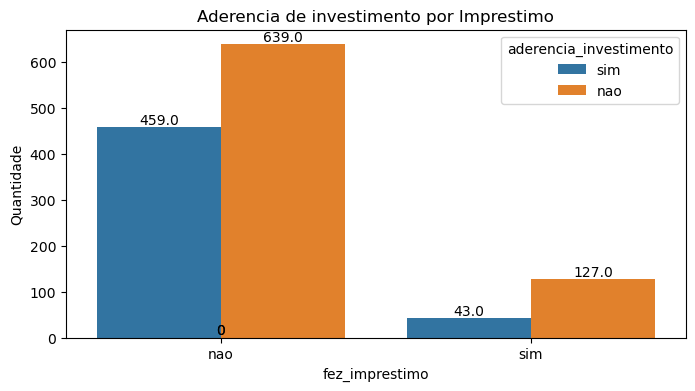

In [14]:
plt.figure(figsize=(8,4))
ax = sns.countplot(df, x='fez_emprestimo', hue='aderencia_investimento')
plt.title("Aderencia de investimento por Imprestimo")
plt.xlabel("fez_imprestimo")
plt.ylabel("Quantidade")

for p in ax.patches:
    altura = p.get_height()
    ax.annotate(f'{altura}',(p.get_x() + p.get_width() / 2., altura),
                ha='center', va='bottom')

plt.show()